# SNOWSLIDE linearity test

Ce notebook a pour objectif de tester la linéarité du modèle. En particulier, son objectif est de tester sur 10 DEM différent dans le Mont Blanc l'erreur commise lorsqu'on admet le modèle comme étant linéaire et de voir si il est donc possible de le faire tourner une seule fois et ne simplement calculer les avalanches qu'en multipliant cette cartographie une fois pour toutes.  

Notons qu'on utilise les données de OGGM téléchargées depuis le cluster. 

In [2]:
import os 
import numpy as np 
import xarray as xr
import matplotlib.pyplot as plt
import rasterio
from snowslide_base import snowslide_base

In [2]:
path = '/Users/llemcf/Desktop/Stage_IGE_2023/Snowslide x OGGM/Glacier_tests'
contenu_du_dossier = os.listdir(path)
dossiers = [element for element in contenu_du_dossier if os.path.isdir(os.path.join(path, element))]
print(dossiers)

['Mer_glace_geant_RGI60-11.03643', 'Tre_la_tete_RGI60-11.03651', 'Nantillons_RGI60-11.03645', 'Brenva_RGI60-11.03001', 'Saleinaz_RGI60-11.02793', 'Bossons_RGI60-11.03646', 'Miage_RGI60-11.03005', 'Tour_RGI60-11.03698', 'Argentiere_RGI60-11.03638', 'Talefre_RGI60-11.03466']


In [3]:
# On lance les snowslide simulations sur les différents DEM et avec les différentes quantités de neige
snow_init = [0.1,0.5,1,2,5]
path = '/Users/llemcf/Desktop/Stage_IGE_2023/Snowslide x OGGM/Glacier_tests'
SNDs = []
for elt1 in snow_init :
    SND_temp = []
    for elt2 in dossiers : 
        dem_path = path + '/' + elt2 + '/' + 'dem.tif'
        param_routing={"routing":'mfd',"preprocessing":True}
        param_prcpt={"init":False,"SND0":None,"quantity":elt1,"time":0,"isotherme":0,"zone":False,"x":None,"y":None}
        SND,convergence,SND_tot = snowslide_base(dem_path,resolution=30,param_routing=param_routing,param_prcpt=param_prcpt)
        SND_temp.append(SND)
    SNDs.append(SND_temp)
SNDs

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Les fonctions et bibliothèques ont été importées
Les grandeurs ont été initialisées, lancement de la simulation...
L'algorithme a convergé en : 71  itérations
Les fonctions et bibliothèques ont été importées
Les grandeurs ont été initialisées, lancement de la simulation...
L'algorithme a convergé en : 39  itérations
Les fonctions et bibliothèques ont été importées
Les grandeurs ont été initialisées, lancement de la simulation...
L'algorithme a convergé en : 13  itérations
Les fonctions et bibliothèques ont été importées
Les grandeurs ont été initialisées, lancement de la simulation...
L'algorithme a convergé en : 31  itérations
Les fonctions et bibliothèques ont été importées
Les grandeurs ont été initialisées, lancement de la simulation...
L'algorithme a convergé en : 25  itérations
Les fonctions et bibliothèques ont été importées
Les grandeurs ont été initialisées, lancement de la simulation...
L'algorithme a convergé en : 68  itérations
Les fonctions et bibliothèques ont été importé

[[array([[0.1       , 0.1       , 0.1       , ..., 0.1       , 0.1       ,
          0.1       ],
         [0.1       , 0.1       , 0.1       , ..., 0.1       , 0.1       ,
          0.1       ],
         [0.1       , 0.1       , 0.1       , ..., 0.1       , 0.1       ,
          0.1       ],
         ...,
         [0.1       , 0.05      , 0.11651745, ..., 0.05      , 0.07143038,
          0.1       ],
         [0.1       , 0.05      , 0.05      , ..., 0.05      , 0.05      ,
          0.1       ],
         [0.1       , 0.1       , 0.1       , ..., 0.1       , 0.1       ,
          0.1       ]]),
  array([[0.1       , 0.1       , 0.1       , ..., 0.1       , 0.1       ,
          0.1       ],
         [0.1       , 0.1       , 0.1       , ..., 0.07775674, 0.05      ,
          0.1       ],
         [0.1       , 0.1       , 0.1       , ..., 0.05      , 0.05      ,
          0.1       ],
         ...,
         [0.1       , 0.1       , 0.1       , ..., 0.1       , 0.1       ,
          0.1

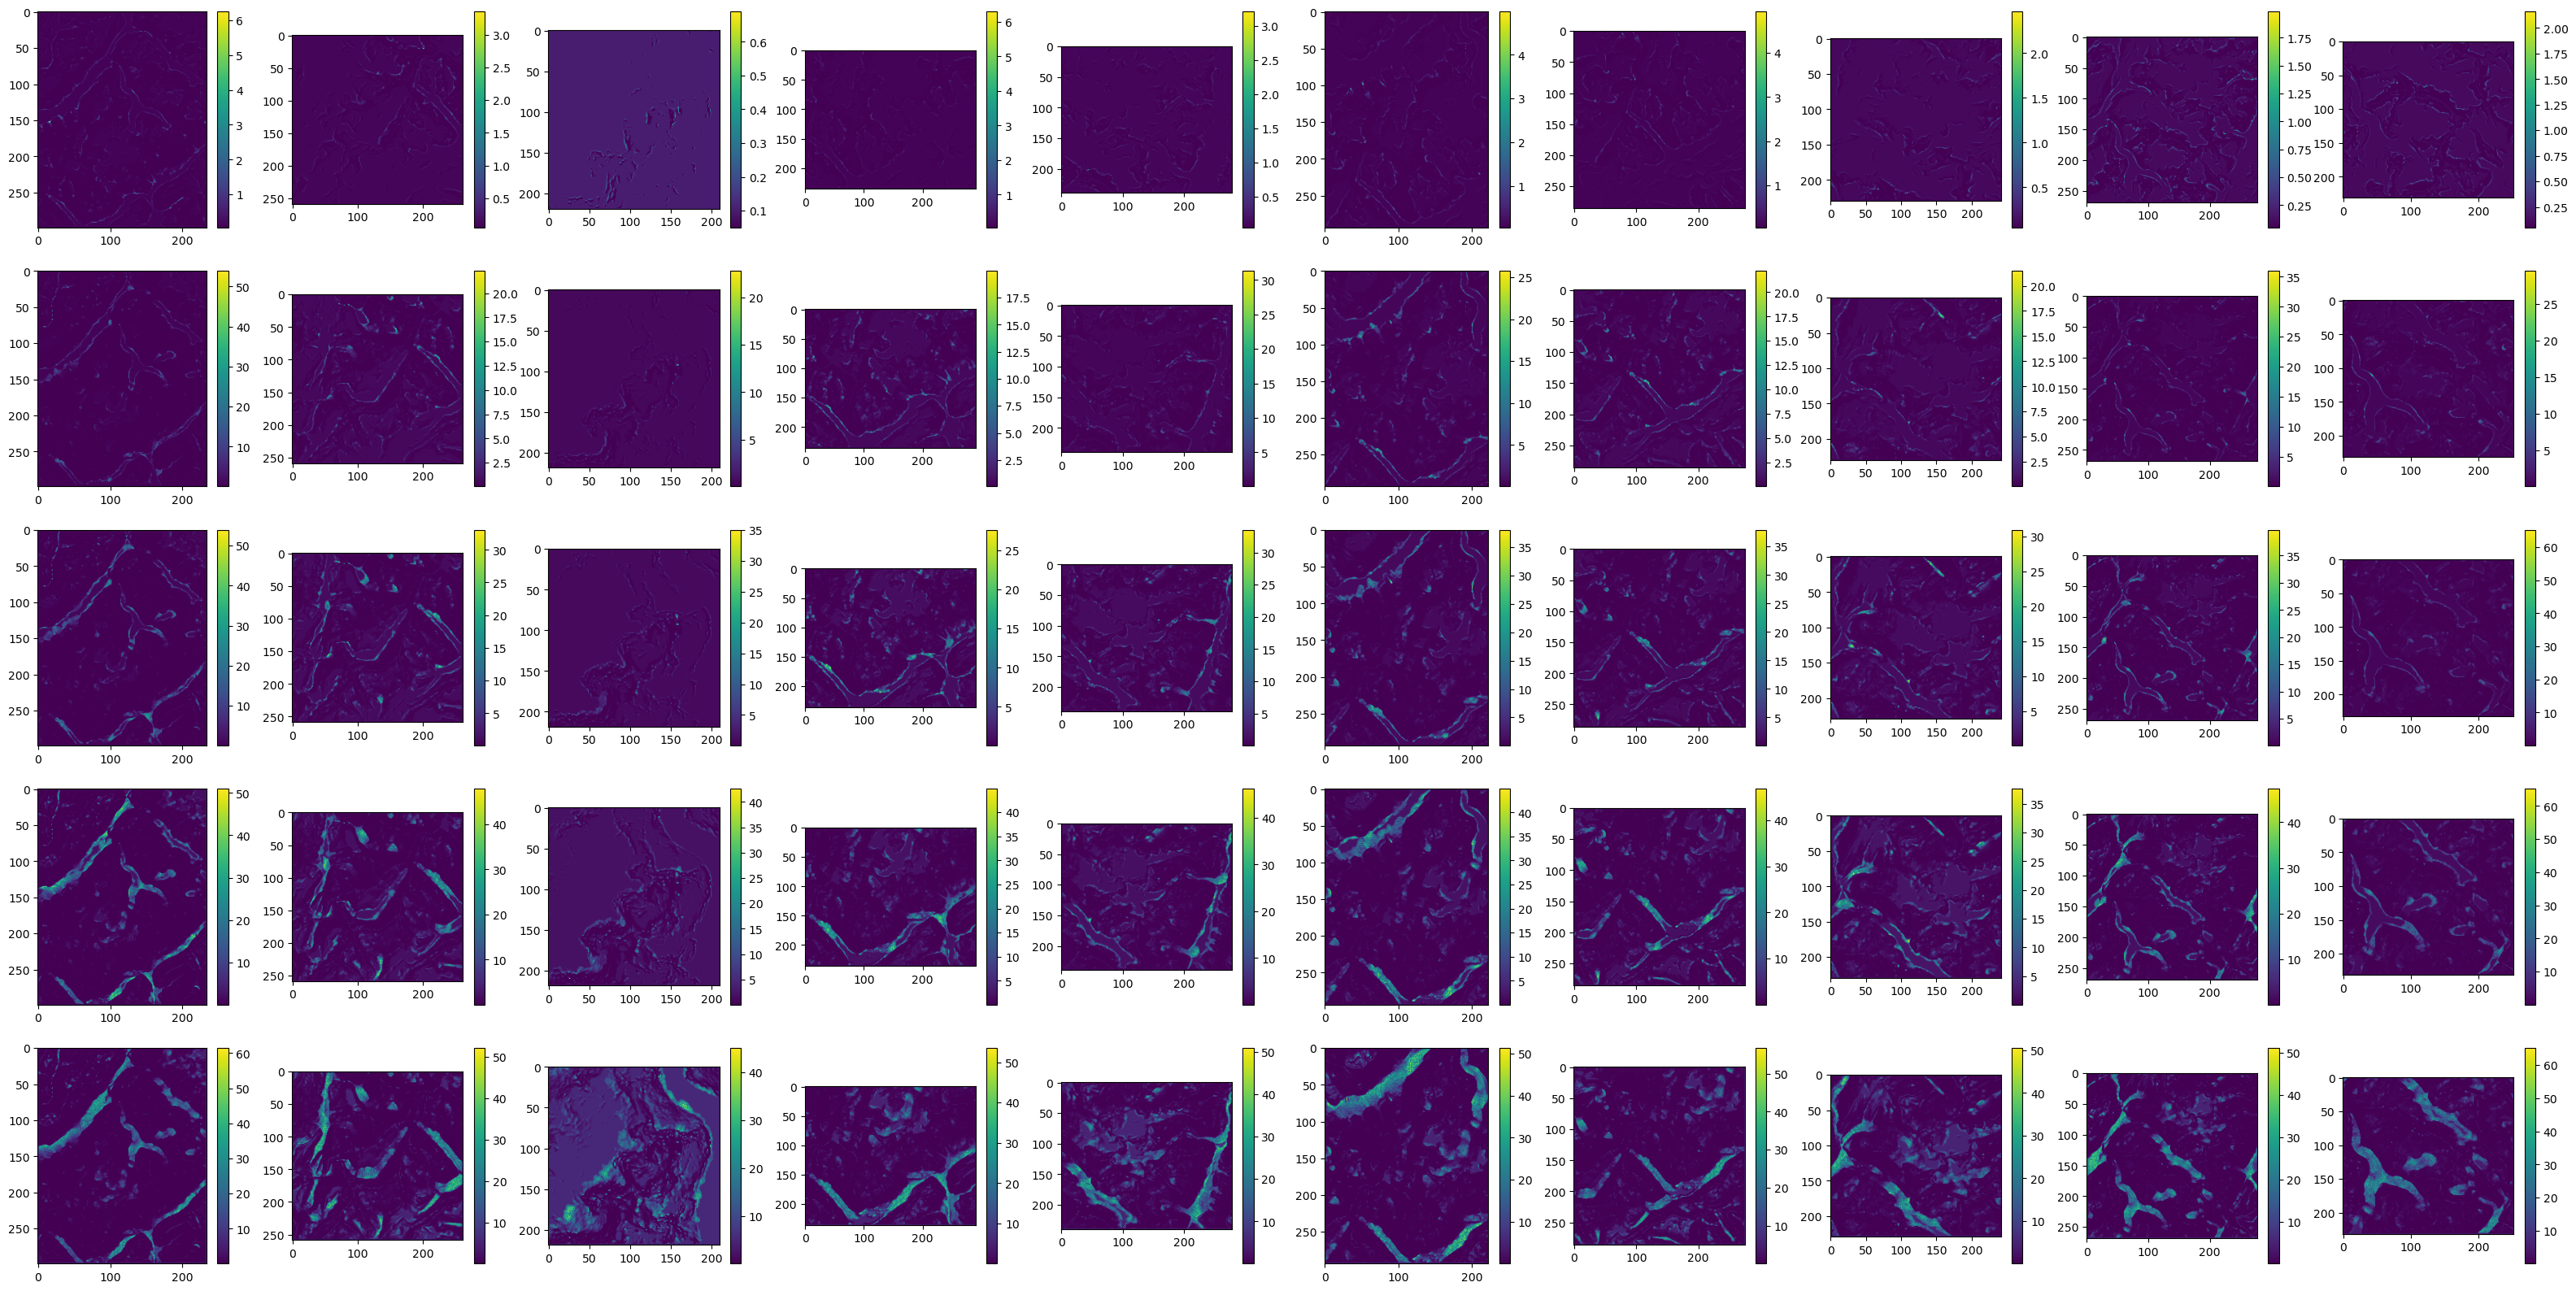

In [4]:
fig, axs = plt.subplots(5,10,figsize=(40,20))
for i in range(5) :
    for j in range(10) :
        fig = axs[i,j].imshow(SNDs[i][j])
        plt.colorbar(fig,ax=axs[i,j])
plt.show()

On obtient donc les résultats de simulation snowslide pour chaque hauteur de neige (colonnes) et chaque DEM différent (lignes). On choisit ensuite d'appliquer le masque du glacier pour ne conserver que les valeurs de neige présente sur les glaciers concernés. 

In [5]:
SNDs = np.array(SNDs)
SND_mask = SNDs.copy()
path = '/Users/llemcf/Desktop/Stage_IGE_2023/Snowslide x OGGM/Glacier_tests'

j=0
for paths in dossiers :
    path_xr = path + '/' + paths + '/' + 'gridded_data.nc'
    gridded_data = xr.open_dataset(path_xr)
    glacier_mask = gridded_data.glacier_mask.values
    for i in range(5) :
        SND_mask[i,j][np.where(glacier_mask==0)]=0
    j=j+1
SND_mask

/var/folders/5j/5cpnb1rn2ljgh2mqrjz6kpk00000gn/T/ipykernel_18126/3398053910.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  SNDs = np.array(SNDs)


array([[array([[0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.],
               ...,
               [0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.]]),
        array([[0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.],
               ...,
               [0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.]]),
        array([[0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.],
               ...,
               [0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.]]),
        array([[0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.],
              

In [6]:
0.3*60

18.0

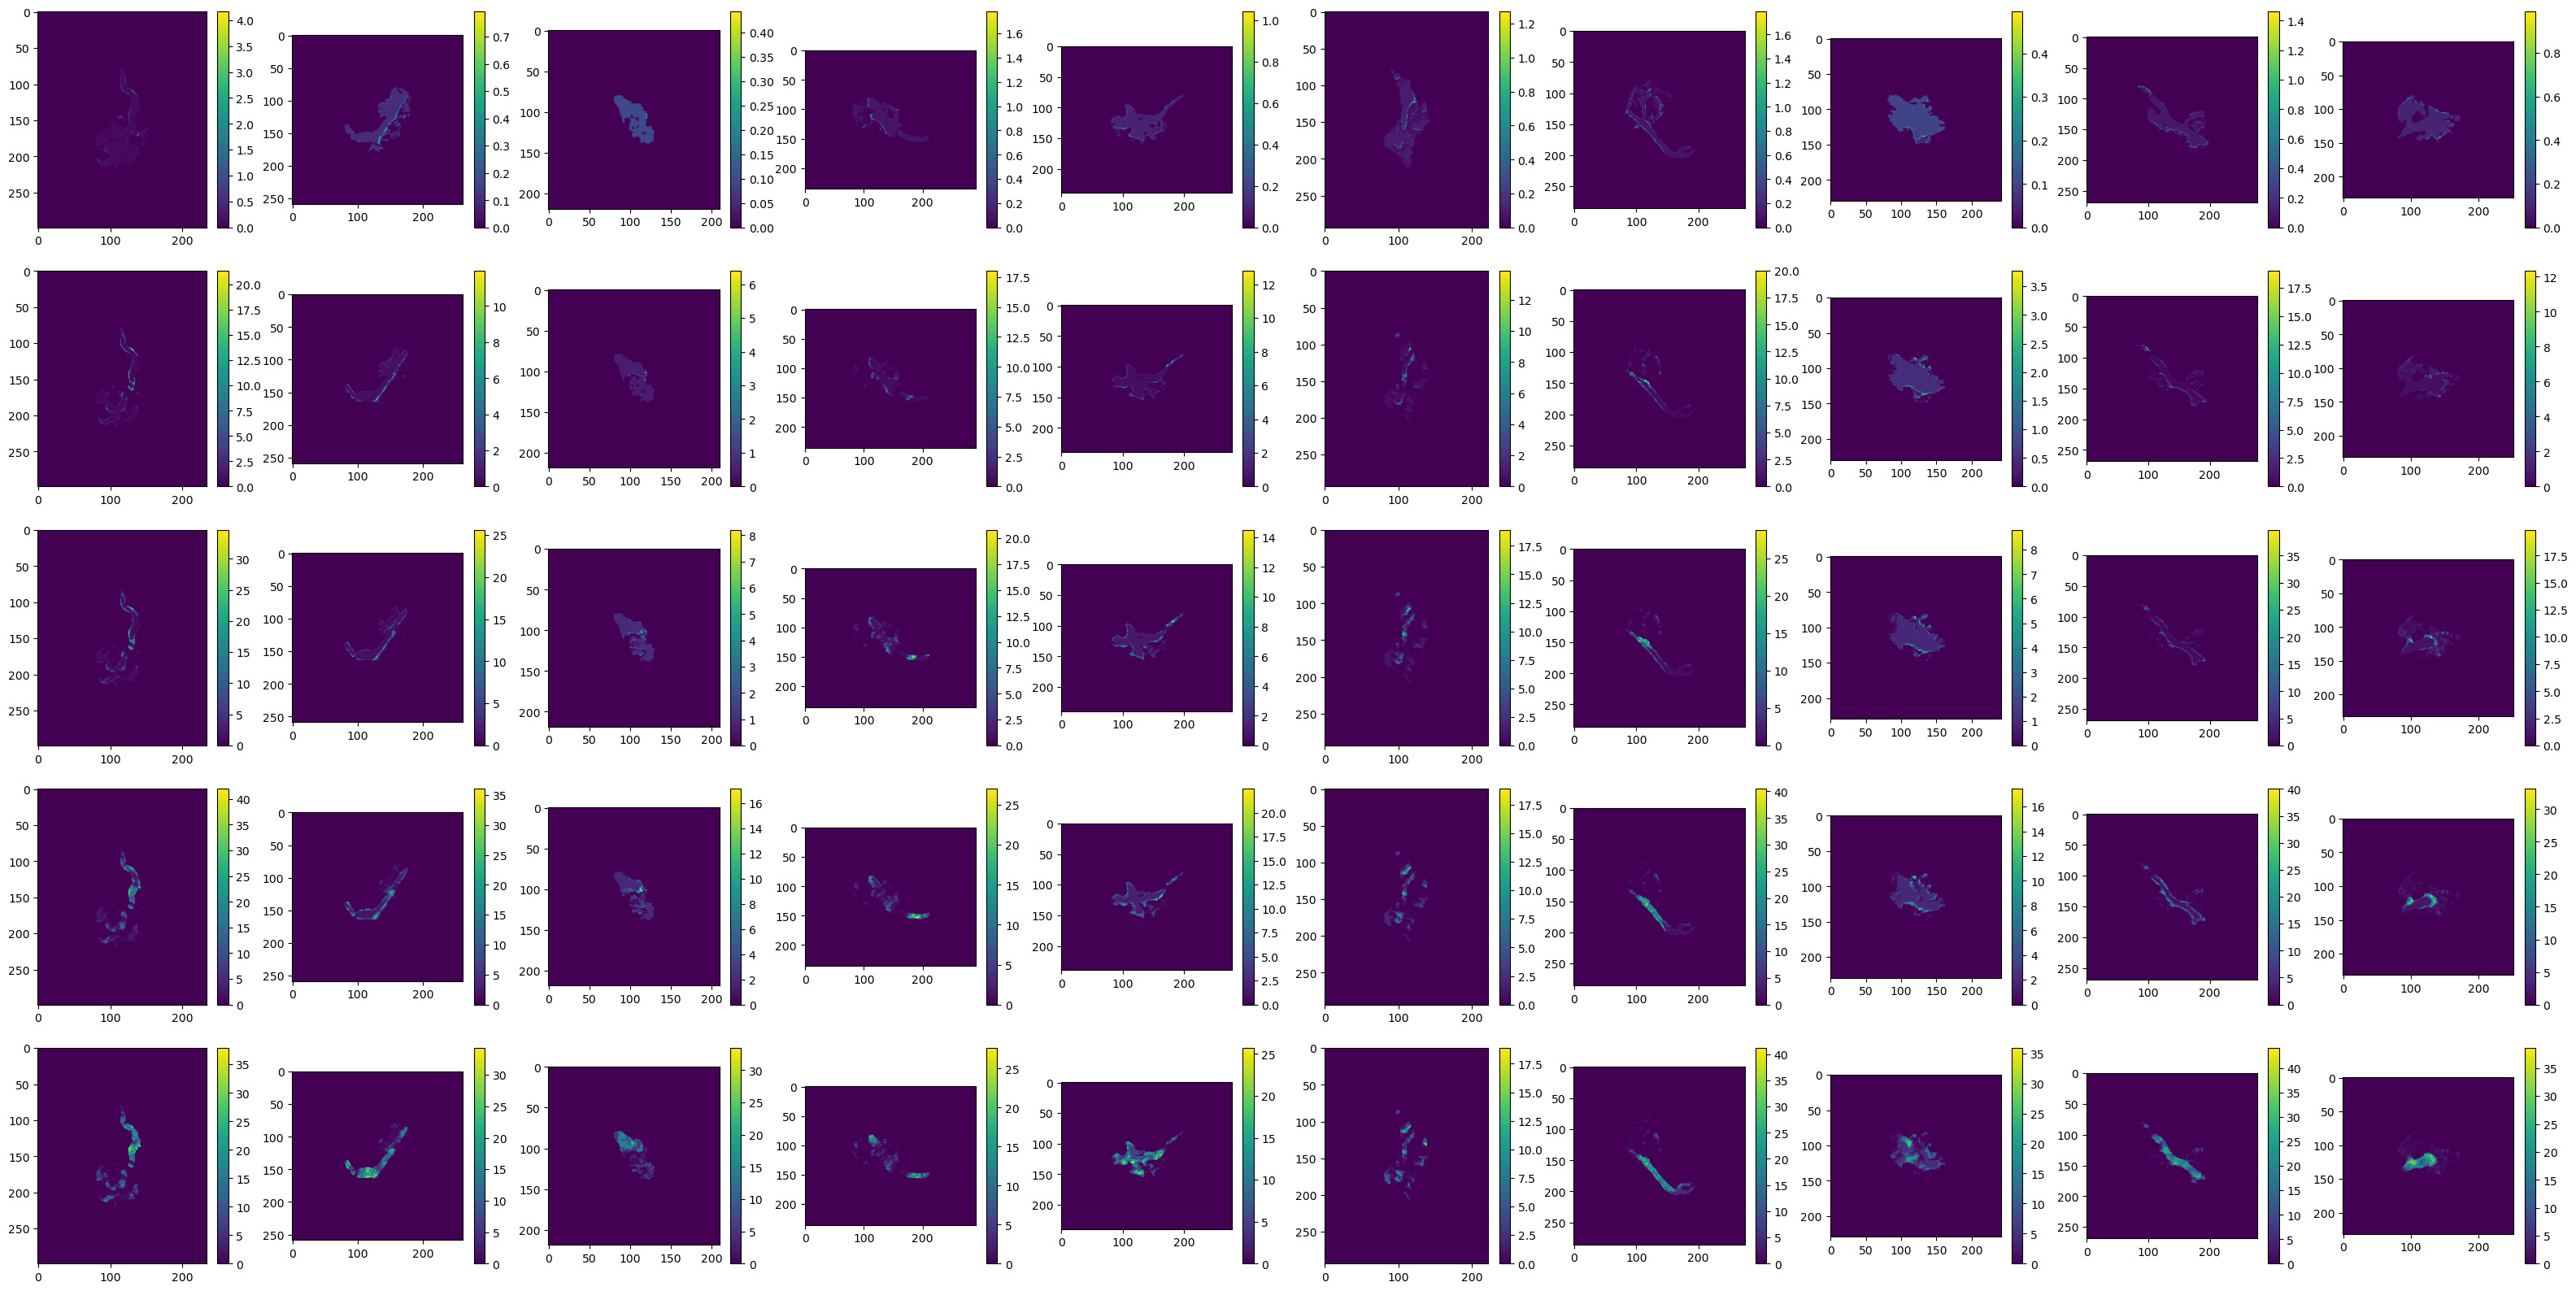

In [7]:
fig, axs = plt.subplots(5,10,figsize=(40,20))
for i in range(5) :
    for j in range(10) :
        fig = axs[i,j].imshow(SND_mask[i][j])
        plt.colorbar(fig,ax=axs[i,j])
plt.show()

In [8]:
# On enregistre pour être sûr d'avoir gardé les infos (long à obtenir quand même)
path = '/Users/llemcf/Desktop/Stage_IGE_2023/Snowslide x OGGM/Glacier_tests/SNDs.npy'
np.save(path,SND_mask)

In [9]:
# on récupère les DEMs dans le même ordre
path = '/Users/llemcf/Desktop/Stage_IGE_2023/Snowslide x OGGM/Glacier_tests'
dems = []
for elt in dossiers :
    dem_path = path + '/' + elt + '/dem.tif'
    with rasterio.open(dem_path) as src :
        dem = src.read(1)
        dems.append(dem)
dems

[array([[2170, 2181, 2203, ..., 3093, 3095, 3097],
        [2147, 2161, 2174, ..., 3109, 3111, 3110],
        [2130, 2140, 2146, ..., 3129, 3125, 3117],
        ...,
        [3586, 3522, 3480, ..., 2042, 1991, 1956],
        [3546, 3495, 3457, ..., 2053, 1994, 1952],
        [3501, 3439, 3412, ..., 2091, 2021, 1951]], dtype=int16),
 array([[1581, 1565, 1550, ..., 3506, 3503, 3503],
        [1582, 1567, 1555, ..., 3517, 3530, 3554],
        [1592, 1574, 1562, ..., 3563, 3597, 3627],
        ...,
        [2408, 2435, 2466, ..., 2898, 2881, 2855],
        [2429, 2453, 2473, ..., 2919, 2892, 2861],
        [2448, 2472, 2477, ..., 2929, 2901, 2864]], dtype=int16),
 array([[1101, 1108, 1114, ..., 2568, 2580, 2593],
        [1105, 1111, 1116, ..., 2575, 2586, 2597],
        [1105, 1111, 1115, ..., 2568, 2582, 2593],
        ...,
        [2808, 2826, 2824, ..., 2274, 2273, 2273],
        [2843, 2860, 2873, ..., 2278, 2276, 2277],
        [2863, 2880, 2908, ..., 2282, 2281, 2281]], dtype=int16)

In [10]:
# On calcule le bin pour chaque DEM 
bins=[]
for i in range(10) :
    min = np.min(dems[i])
    max = np.max(dems[i])
    bin = np.arange(min,max+10,100)
    bins.append(bin)
bins

[array([ 978, 1078, 1178, 1278, 1378, 1478, 1578, 1678, 1778, 1878, 1978,
        2078, 2178, 2278, 2378, 2478, 2578, 2678, 2778, 2878, 2978, 3078,
        3178, 3278, 3378, 3478, 3578, 3678, 3778, 3878, 3978, 4078, 4178,
        4278, 4378, 4478, 4578, 4678, 4778]),
 array([ 986, 1086, 1186, 1286, 1386, 1486, 1586, 1686, 1786, 1886, 1986,
        2086, 2186, 2286, 2386, 2486, 2586, 2686, 2786, 2886, 2986, 3086,
        3186, 3286, 3386, 3486, 3586, 3686, 3786, 3886, 3986, 4086, 4186,
        4286, 4386, 4486, 4586, 4686]),
 array([1096, 1196, 1296, 1396, 1496, 1596, 1696, 1796, 1896, 1996, 2096,
        2196, 2296, 2396, 2496, 2596, 2696, 2796, 2896, 2996, 3096, 3196,
        3296, 3396, 3496, 3596]),
 array([1089, 1189, 1289, 1389, 1489, 1589, 1689, 1789, 1889, 1989, 2089,
        2189, 2289, 2389, 2489, 2589, 2689, 2789, 2889, 2989, 3089, 3189,
        3289, 3389, 3489, 3589, 3689, 3789, 3889, 3989, 4089, 4189, 4289,
        4389, 4489, 4589, 4689]),
 array([ 973, 1073, 1173, 1273, 

In [11]:
# On projette les altitudes du glacier en elevand_band_flowline 
flowlines = []
for i in range(10) :
    flowline = np.digitize(dems[i],bins[i])
    flowlines.append(flowline)
flowlines

[array([[12, 13, 13, ..., 22, 22, 22],
        [12, 12, 12, ..., 22, 22, 22],
        [12, 12, 12, ..., 22, 22, 22],
        ...,
        [27, 26, 26, ..., 11, 11, 10],
        [26, 26, 25, ..., 11, 11, 10],
        [26, 25, 25, ..., 12, 11, 10]]),
 array([[ 6,  6,  6, ..., 26, 26, 26],
        [ 6,  6,  6, ..., 26, 26, 26],
        [ 7,  6,  6, ..., 26, 27, 27],
        ...,
        [15, 15, 15, ..., 20, 19, 19],
        [15, 15, 15, ..., 20, 20, 19],
        [15, 15, 15, ..., 20, 20, 19]]),
 array([[ 1,  1,  1, ..., 15, 15, 15],
        [ 1,  1,  1, ..., 15, 15, 16],
        [ 1,  1,  1, ..., 15, 15, 15],
        ...,
        [18, 18, 18, ..., 12, 12, 12],
        [18, 18, 18, ..., 12, 12, 12],
        [18, 18, 19, ..., 12, 12, 12]]),
 array([[ 4,  4,  4, ..., 19, 19, 20],
        [ 4,  4,  4, ..., 19, 20, 20],
        [ 4,  4,  5, ..., 20, 20, 21],
        ...,
        [20, 20, 20, ...,  8,  8,  9],
        [20, 20, 20, ...,  8,  8,  9],
        [20, 20, 20, ...,  8,  8,  9]]),
 arr

In [12]:
elevation_band_flowlines = []
factors = [10,2,1,0.5,1/5]

for j in range(10) :
    elevation_band_flowlines_temp=[]
    for i in range(5) :
        elevation_band_flowline = np.zeros((len(bins[j])))
        for x in range(len(bins[j])) :
            elevation_band_flowline[x] = np.sum(SNDs[i][j][np.where(flowlines[j]==x)])*factors[i]
        elevation_band_flowlines_temp.append(elevation_band_flowline)
    elevation_band_flowlines.append(elevation_band_flowlines_temp)

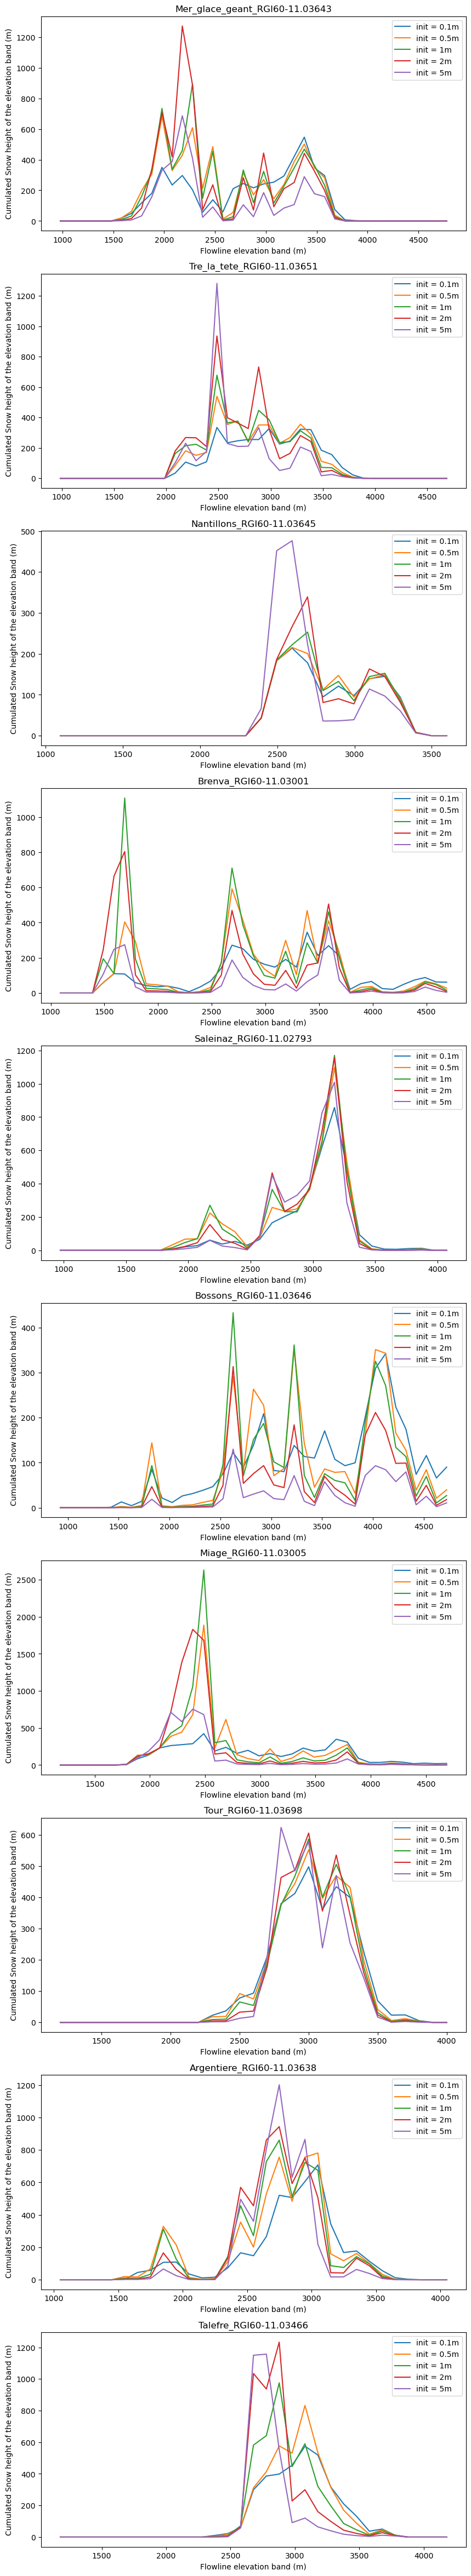

In [13]:
names = ['init = 0.1m','init = 0.5m','init = 1m','init = 2m','init = 5m']
fig,axs = plt.subplots(10,1,figsize = (10,60))
for i in range(10) :
    for j in range(5) : 
        plot = axs[i].plot(bins[i],elevation_band_flowlines[i][j])
        axs[i].set_title(dossiers[i])
        axs[i].set_xlabel('Flowline elevation band (m)')
        axs[i].set_ylabel('Cumulated Snow height of the elevation band (m)')
        axs[i].legend(names)
plt.show()

On constate en particulier que pour des hauteurs initiales importantes de neige, le haut du glacier présente une tendance à se vider. Cela peut certainement être relié au fait que les avalanches se produisent sur une plus grande distance lorsqu'il y a plus de neige initialement. 

Il peut ensuite être intéressant de plotter des valeurs d'intégrales des hauteurs de neige sur la flowline par rapport à une quantité initiale pour vérifier si là aussi on a d'éventuelles ruptures de linéarité ou pas. 

In [62]:
# Intégrale des hauteurs finales de neige 
path = '/Users/llemcf/Desktop/Stage_IGE_2023/Snowslide x OGGM/Glacier_tests/SNDs.npy'
SND_mask = np.load(path,allow_pickle=True)
np.shape(SND_mask)
integral = []
for i in range(5) :
    int = []
    for j in range(10) : 
        int.append(np.sum(SND_mask[i][j]))
    integral.append(int)
integral = np.array(integral)
integral = np.transpose(integral)
integral

array([[  486.58711292,  3049.85420913,  6152.74013273, 12792.0672233 ,
        16619.95141689],
       [  353.70015508,  2097.32310717,  4510.78278139,  9880.55823632,
        17897.57812158],
       [  131.80123546,   691.08051072,  1422.33084238,  2960.7848771 ,
         8035.75460707],
       [  369.5627225 ,  2342.25255313,  5018.08090652,  8336.16851987,
         9271.53195578],
       [  341.54627499,  2113.68027482,  4285.20115176,  8226.07741118,
        19229.41671709],
       [  354.69598289,  1736.11634466,  3094.70410852,  3926.36585999,
         4651.82517558],
       [  466.90707156,  3227.34444454,  6793.69830829, 14029.14025117,
        18724.30168584],
       [  327.34569591,  1667.13242169,  3287.77778481,  6478.30905524,
        15296.5050888 ],
       [  425.21867277,  2609.99884394,  5298.95551561, 10787.69863835,
        24561.38950312],
       [  348.29008182,  1965.65945978,  4030.11218376,  8350.01298504,
        16421.39281781]])

In [61]:
# Quantités initiales 
init = np.zeros((5,10))
heights = np.array([0.1,0.5,1,2,5])
for i in range(5) :
    init[i][:] = heights[i]
init = np.transpose(init)
init

array([[0.1, 0.5, 1. , 2. , 5. ],
       [0.1, 0.5, 1. , 2. , 5. ],
       [0.1, 0.5, 1. , 2. , 5. ],
       [0.1, 0.5, 1. , 2. , 5. ],
       [0.1, 0.5, 1. , 2. , 5. ],
       [0.1, 0.5, 1. , 2. , 5. ],
       [0.1, 0.5, 1. , 2. , 5. ],
       [0.1, 0.5, 1. , 2. , 5. ],
       [0.1, 0.5, 1. , 2. , 5. ],
       [0.1, 0.5, 1. , 2. , 5. ]])

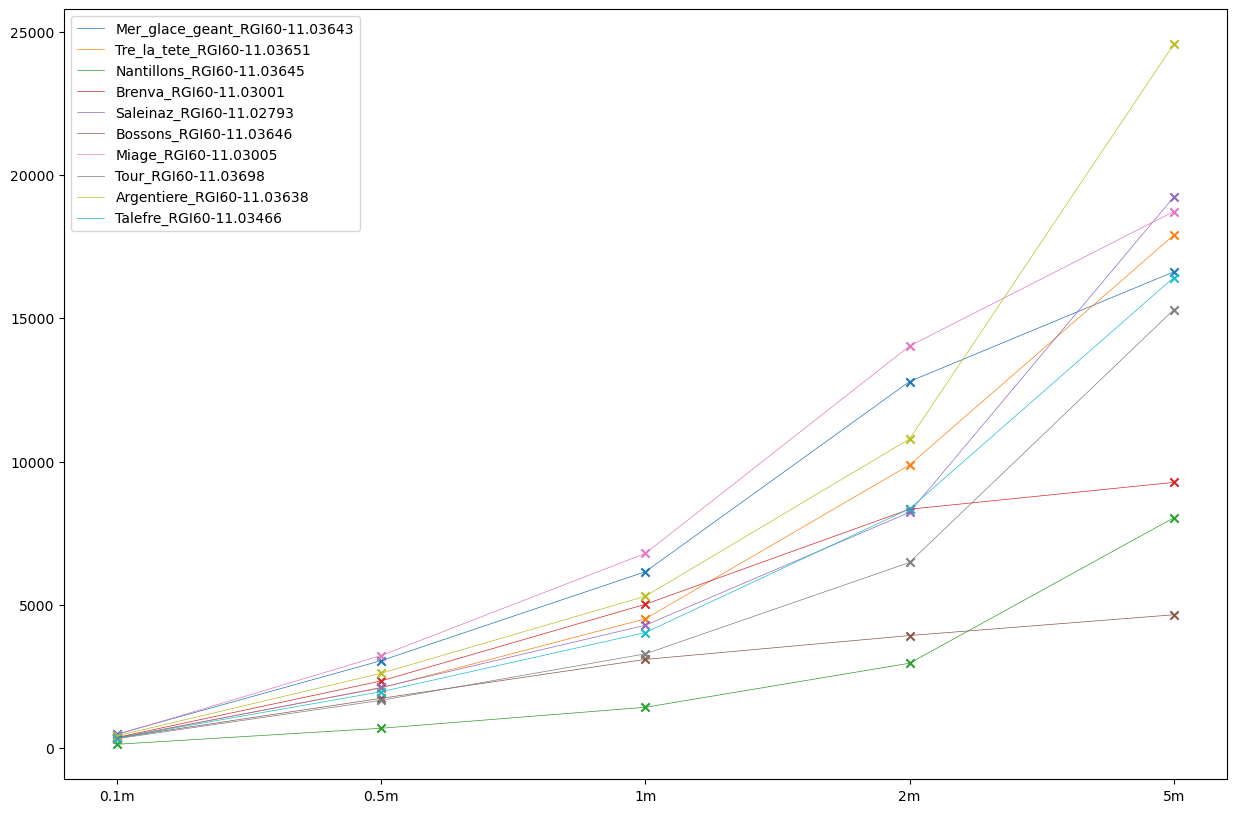

In [107]:
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan']
plt.figure(figsize=(15,10))
for i in range(10) :
    plt.scatter(['0.1m', '0.5m', '1m', '2m', '5m'],integral[i],color=colors[i],marker="x")
    plt.plot(['0.1m', '0.5m', '1m', '2m', '5m'],integral[i], color=colors[i],linewidth=0.5,label=dossiers[i])
plt.legend()

Text(0, 0.5, 'Quantité totale de neige sur le glacier')

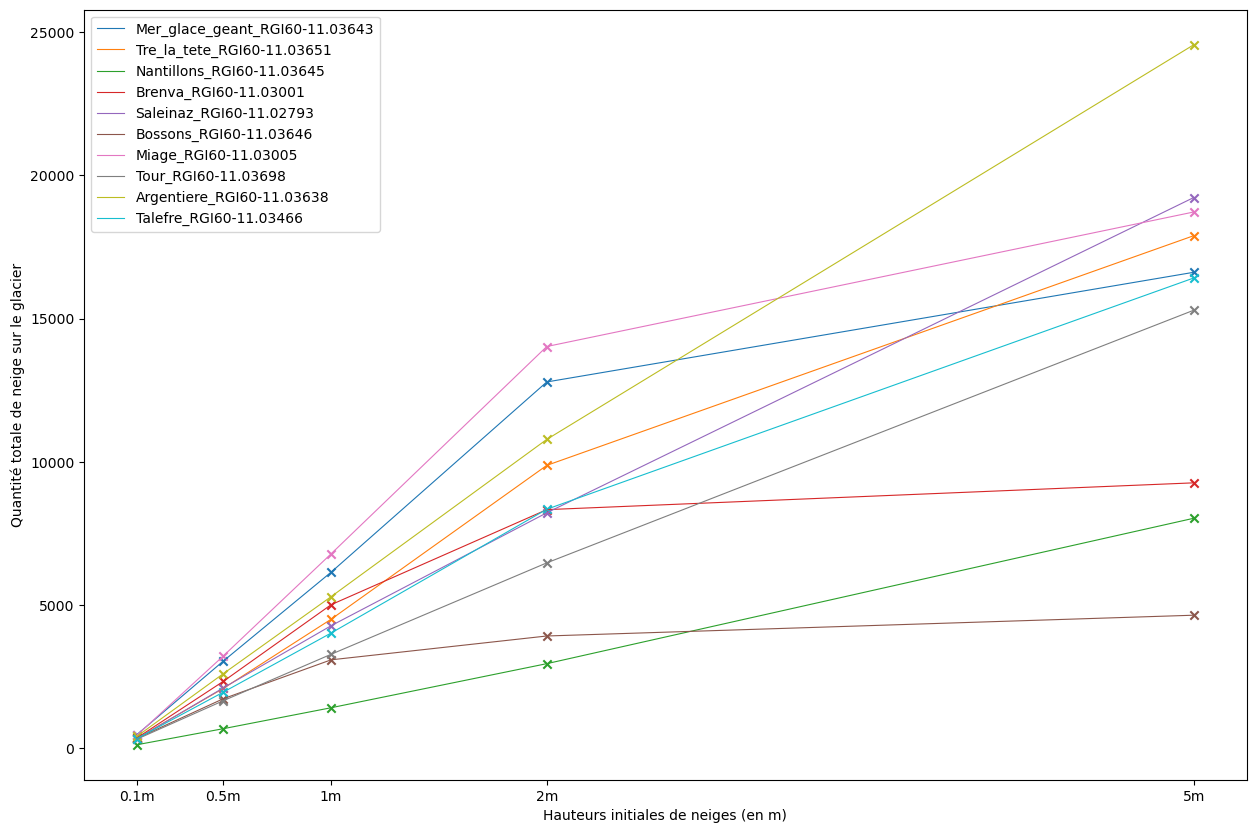

In [108]:
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan']
plt.figure(figsize=(15,10))
for i in range(10) :
    plt.scatter(init[i],integral[i],color=colors[i],marker="x")
    plt.plot(init[i],integral[i], color=colors[i],linewidth=0.8,label=dossiers[i])
    plt.xticks(init[i], ['0.1m', '0.5m', '1m', '2m', '5m'])
plt.legend()
plt.xlabel("Hauteurs initiales de neiges (en m)")
plt.ylabel("Quantité totale de neige sur le glacier")

Ok c'est pas mal. On voit clairement qu'il y a des processus non linéaires. Une chose intéressante c'est qu'on a une hauteur de neige à partir de laquelle on voit une forme de saturation. Il peut être intéressant de diviser par la surface totale du glacier pour voir l'impact 'caché' que peut avoir la surface là dessus. 

In [196]:
import os 
path_dir = "/Users/llemcf/Desktop/Stage_IGE_2023/Snowslide x OGGM/Glacier_tests"
dir = os.listdir(path_dir)
directory = []
for i in range(len(dir)) :
    if '.DS_Store' not in dir[i] :
        if 'SND' not in dir[i] :
            chemin = path_dir + "/" + dir[i] + "/dem.tif"
            directory.append(chemin)
directory

['/Users/llemcf/Desktop/Stage_IGE_2023/Snowslide x OGGM/Glacier_tests/Mer_glace_geant_RGI60-11.03643/dem.tif',
 '/Users/llemcf/Desktop/Stage_IGE_2023/Snowslide x OGGM/Glacier_tests/Tre_la_tete_RGI60-11.03651/dem.tif',
 '/Users/llemcf/Desktop/Stage_IGE_2023/Snowslide x OGGM/Glacier_tests/Nantillons_RGI60-11.03645/dem.tif',
 '/Users/llemcf/Desktop/Stage_IGE_2023/Snowslide x OGGM/Glacier_tests/Brenva_RGI60-11.03001/dem.tif',
 '/Users/llemcf/Desktop/Stage_IGE_2023/Snowslide x OGGM/Glacier_tests/Saleinaz_RGI60-11.02793/dem.tif',
 '/Users/llemcf/Desktop/Stage_IGE_2023/Snowslide x OGGM/Glacier_tests/Bossons_RGI60-11.03646/dem.tif',
 '/Users/llemcf/Desktop/Stage_IGE_2023/Snowslide x OGGM/Glacier_tests/Miage_RGI60-11.03005/dem.tif',
 '/Users/llemcf/Desktop/Stage_IGE_2023/Snowslide x OGGM/Glacier_tests/Tour_RGI60-11.03698/dem.tif',
 '/Users/llemcf/Desktop/Stage_IGE_2023/Snowslide x OGGM/Glacier_tests/Argentiere_RGI60-11.03638/dem.tif',
 '/Users/llemcf/Desktop/Stage_IGE_2023/Snowslide x OGGM/Glac

In [198]:
resolutions = []
for i in range(len(directory)) :
    with rasterio.open(directory[i]) as src : 
        resolutions.append(src.res[0])
resolutions

[79.0, 51.0, 21.0, 49.0, 47.0, 57.0, 56.0, 50.0, 62.0, 49.0]

In [ ]:
# Intégrale des hauteurs finales de neige 
path = '/Users/llemcf/Desktop/Stage_IGE_2023/Snowslide x OGGM/Glacier_tests/SNDs.npy'
SND_mask = np.load(path,allow_pickle=True)
np.shape(SND_mask)
integral2 = []
for i in range(5) :
    int = []
    for j in range(10) : 
        int.append(np.mean(SND_mask[i][j])/(30*30))
    integral2.append(int)
integral2 = np.array(integral)
integral2 = np.transpose(integral)
integral2

In [183]:
with rasterio.open("/Users/llemcf/Desktop/Stage_IGE_2023/Snowslide x OGGM/Glacier_tests/Nantillons_RGI60-11.03645/dem.tif") as src : 
    res = src.res
res


(21.0, 21.0)

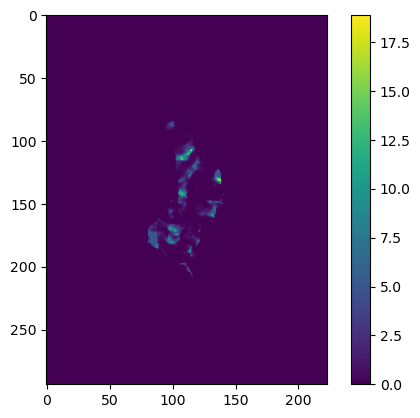

In [171]:
i = 4
plt.imshow(SNDs[i][5])
plt.colorbar()

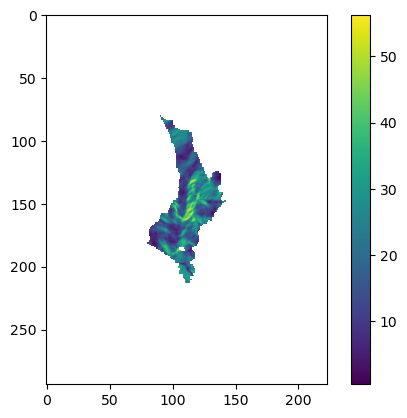

In [173]:
from fonctions import slope
dem_path = "/Users/llemcf/Desktop/Stage_IGE_2023/Snowslide x OGGM/Glacier_tests/Bossons_RGI60-11.03646/dem.tif"
with rasterio.open(dem_path) as src :
    dem = src.read(1)
    res = src.res[0]
pente = slope(dem,res)
xr_path = "/Users/llemcf/Desktop/Stage_IGE_2023/Snowslide x OGGM/Glacier_tests/Bossons_RGI60-11.03646/gridded_data.nc"
ds = xr.open_dataset(xr_path)

pente[np.where(ds.glacier_mask==0)] = np.nan
plt.imshow(pente)
plt.colorbar()

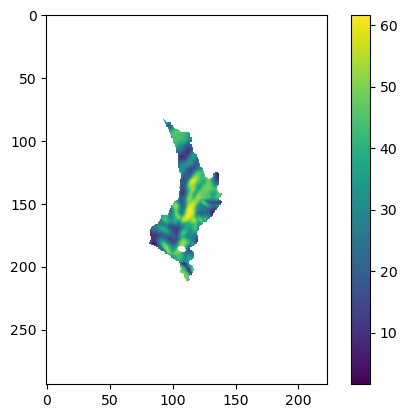

In [181]:
plt.imshow(slope(ds.topo_smoothed.where(ds.glacier_mask==1).values,30))
plt.colorbar()

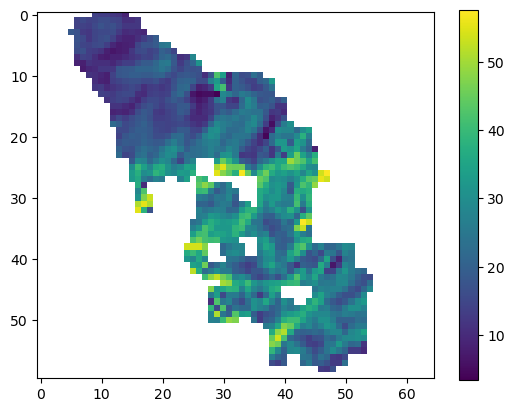

In [225]:
from fonctions import slope
dem_path = "/Users/llemcf/Desktop/Stage_IGE_2023/Snowslide x OGGM/Glacier_tests/Nantillons_RGI60-11.03645/dem.tif"
with rasterio.open(dem_path) as src :
    dem = src.read(1)
    res = src.res[0]
pente = slope(dem,res)
xr_path = "/Users/llemcf/Desktop/Stage_IGE_2023/Snowslide x OGGM/Glacier_tests/Nantillons_RGI60-11.03645/gridded_data.nc"
ds = xr.open_dataset(xr_path)

pente[np.where(ds.glacier_mask==0)] = np.nan
plt.imshow(pente[80:140,75:140])
plt.colorbar()

## On recommence car problème de résolution + volonté de faire plus de tests valeurs

['Mer_glace_geant_RGI60-11.03643', 'Tre_la_tete_RGI60-11.03651', 'Nantillons_RGI60-11.03645', 'Brenva_RGI60-11.03001', 'Saleinaz_RGI60-11.02793', 'Bossons_RGI60-11.03646', 'Miage_RGI60-11.03005', 'Tour_RGI60-11.03698', 'Argentiere_RGI60-11.03638', 'Talefre_RGI60-11.03466']
... ... ... ... ... ... ... ...
0% d'avancement
... ... ... ... ... ... ... ...
Les fonctions et bibliothèques ont été importées
Les grandeurs ont été initialisées, lancement de la simulation...
L'algorithme a convergé en : 10  itérations
... ... ... ... ... ... ... ...
1% d'avancement
... ... ... ... ... ... ... ...
Les fonctions et bibliothèques ont été importées
Les grandeurs ont été initialisées, lancement de la simulation...
L'algorithme a convergé en : 12  itérations
... ... ... ... ... ... ... ...
2% d'avancement
... ... ... ... ... ... ... ...
Les fonctions et bibliothèques ont été importées
Les grandeurs ont été initialisées, lancement de la simulation...
L'algorithme a convergé en : 21  itérations
... ... .

/var/folders/5j/5cpnb1rn2ljgh2mqrjz6kpk00000gn/T/ipykernel_18126/2344595674.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  SNDs = np.array(SNDs)


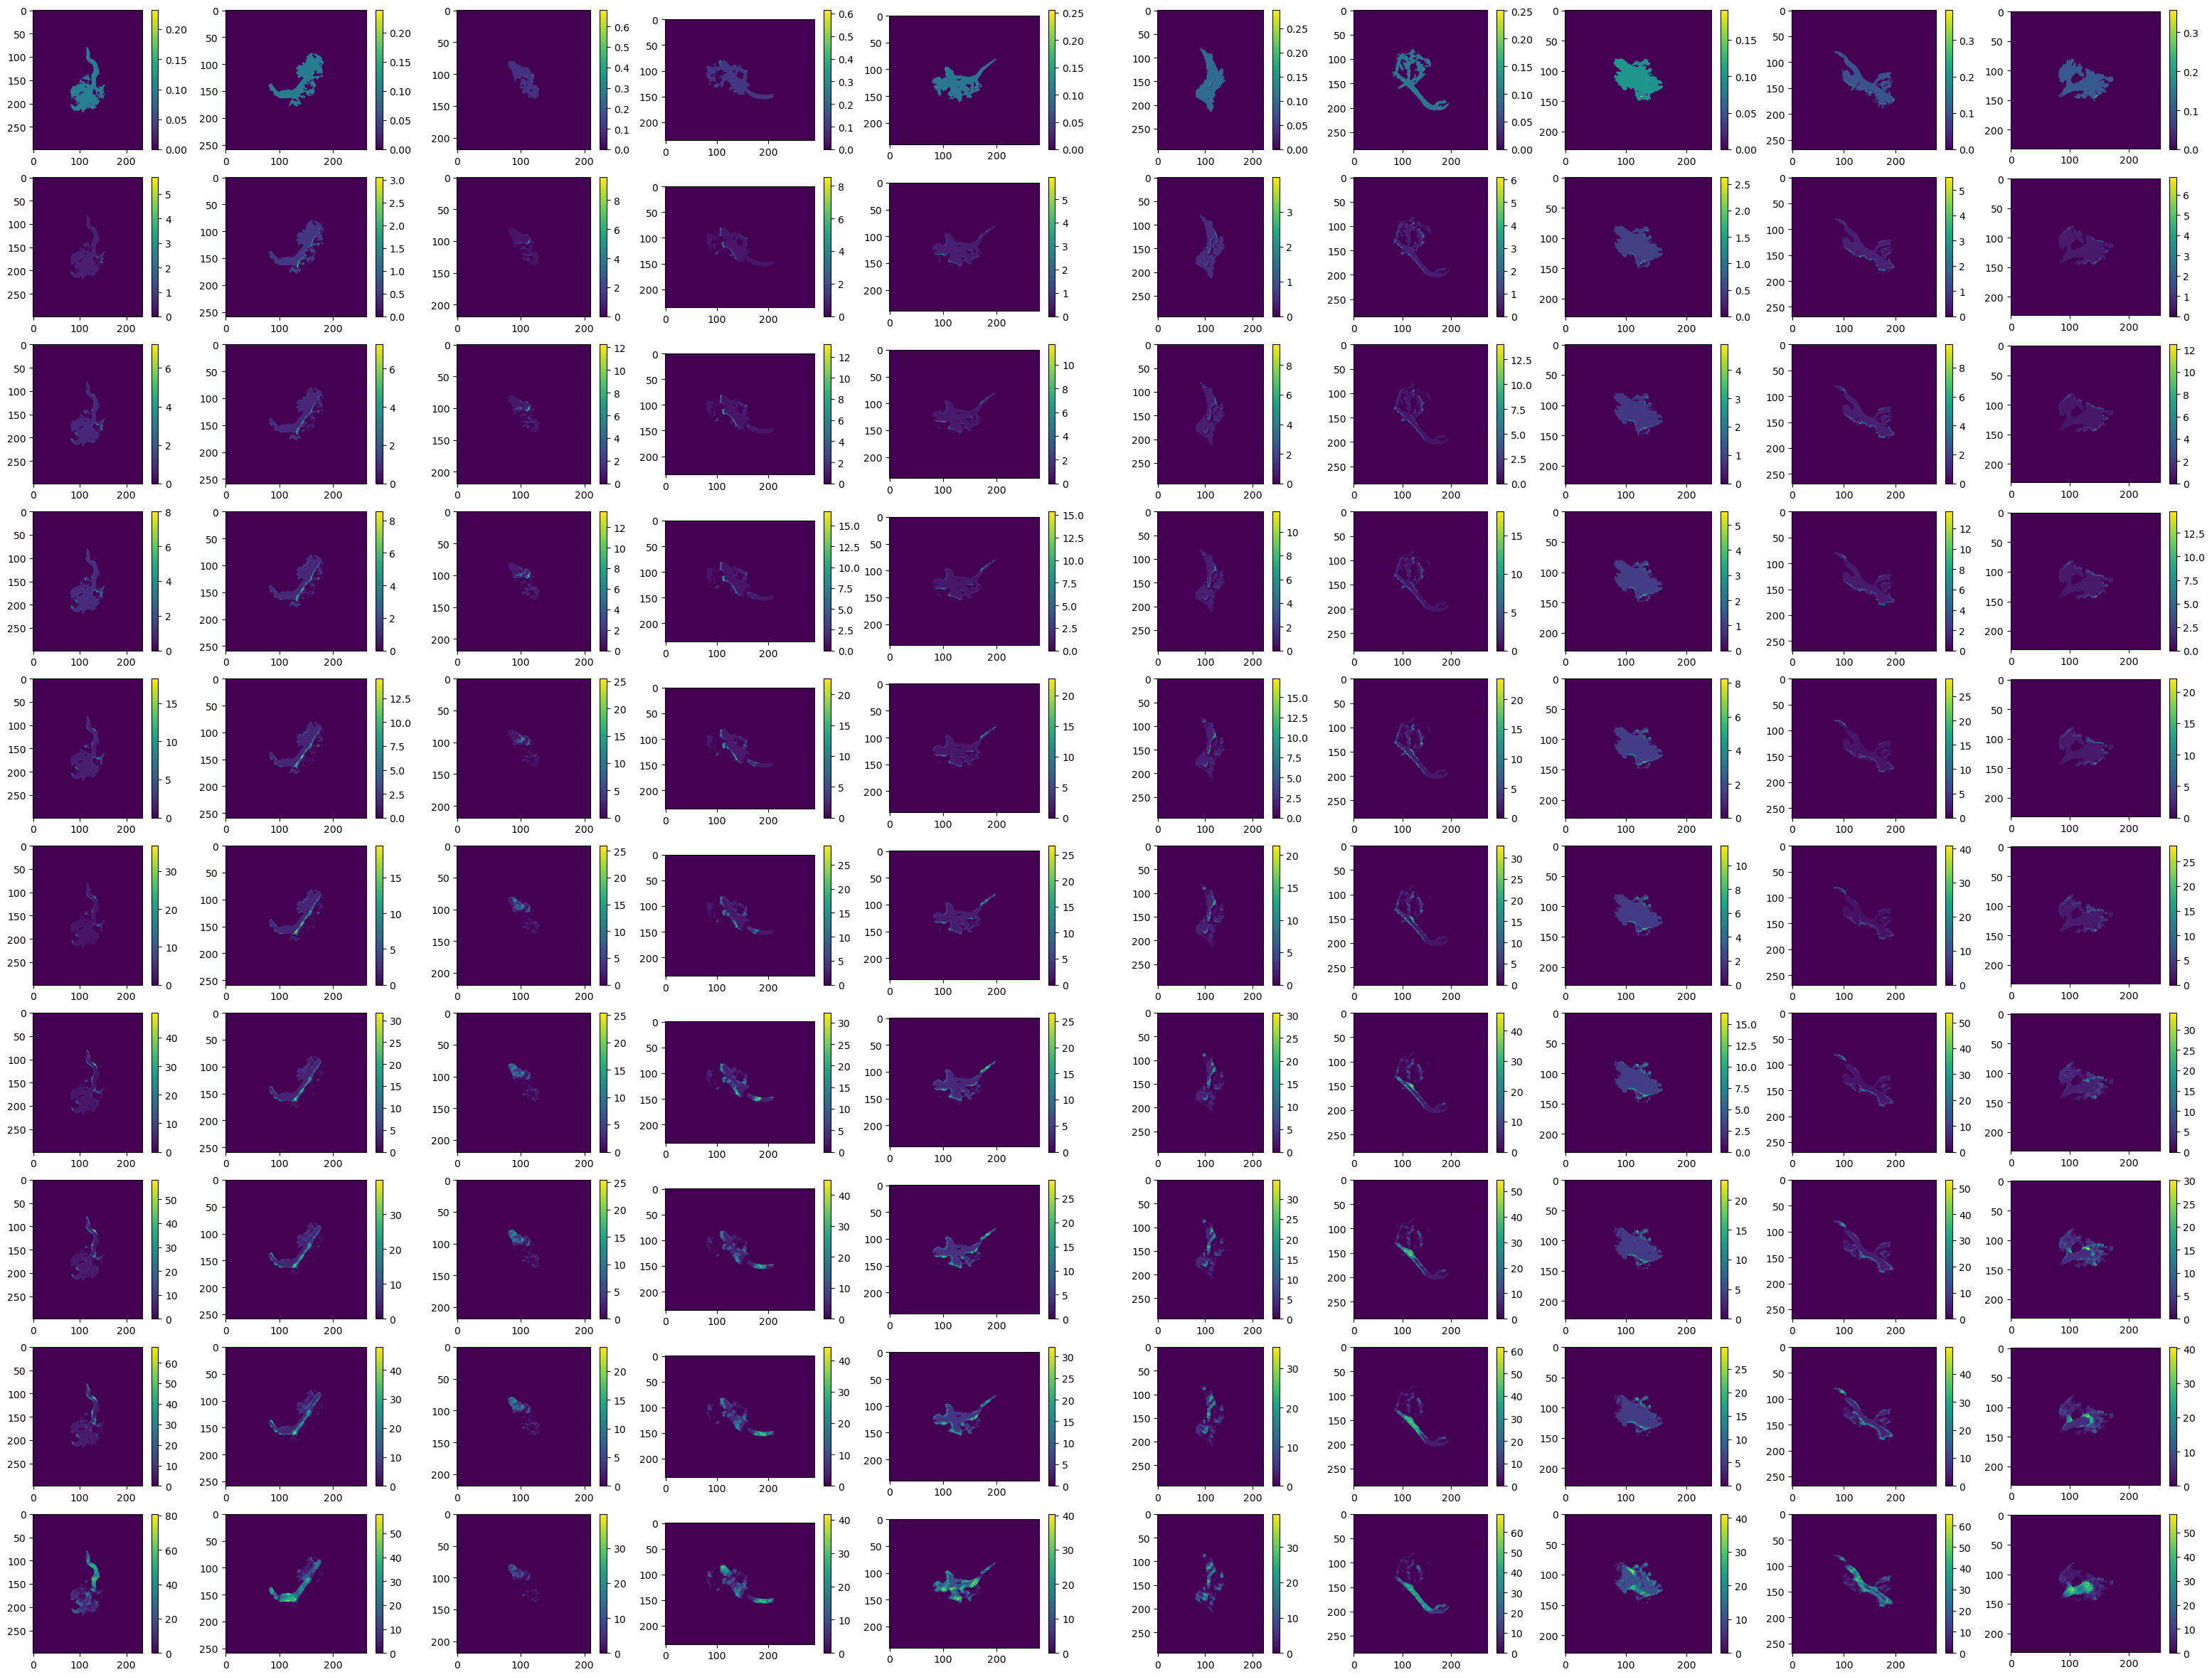

In [230]:
path = '/Users/llemcf/Desktop/Stage_IGE_2023/Snowslide x OGGM/Glacier_tests'
contenu_du_dossier = os.listdir(path)
dossiers = [element for element in contenu_du_dossier if os.path.isdir(os.path.join(path, element))]
print(dossiers)

# On lance les snowslide simulations sur les différents DEM et avec les différentes quantités de neige
snow_init = [0.1,0.5,0.8,1,1.5,2,3,4,5,10]
path = '/Users/llemcf/Desktop/Stage_IGE_2023/Snowslide x OGGM/Glacier_tests'
SNDs = []
iter = 0
for elt1 in snow_init :
    SND_temp = []
    for elt2 in dossiers : 
        dem_path = path + '/' + elt2 + '/' + 'dem.tif'
        with rasterio.open(dem_path) as src : 
            res = src.res[0]
        param_routing={"routing":'mfd',"preprocessing":True}
        param_prcpt={"init":False,"SND0":None,"quantity":elt1,"time":0,"isotherme":0,"zone":False,"x":None,"y":None}
        
        print("... ... ... ... ... ... ... ...")
        print(f"{iter}% d'avancement")
        print("... ... ... ... ... ... ... ...")
        
        SND,convergence,SND_tot = snowslide_base(dem_path,resolution=res,param_routing=param_routing,param_prcpt=param_prcpt)
        SND_temp.append(SND)
        iter = iter + 1
    SNDs.append(SND_temp)

SNDs = np.array(SNDs)
SND_mask = SNDs.copy()
path = '/Users/llemcf/Desktop/Stage_IGE_2023/Snowslide x OGGM/Glacier_tests'

j=0
for paths in dossiers :
    path_xr = path + '/' + paths + '/' + 'gridded_data.nc'
    gridded_data = xr.open_dataset(path_xr)
    glacier_mask = gridded_data.glacier_mask.values
    for i in range(len(snow_init)) :
        SND_mask[i,j][np.where(glacier_mask==0)]=0
    j=j+1

# On enregistre pour être sûr d'avoir gardé les infos (long à obtenir quand même)
path = '/Users/llemcf/Desktop/Stage_IGE_2023/Snowslide x OGGM/Glacier_tests/SNDs_2.npy'
np.save(path,SND_mask)

# On affiche les résultats 
lignes = len(snow_init)
fig, axs = plt.subplots(lignes,10,figsize=(40,30))
for i in range(lignes) :
    for j in range(10) :
        fig = axs[i,j].imshow(SND_mask[i][j])
        plt.colorbar(fig,ax=axs[i,j])
plt.show()

In [9]:
path = '/Users/llemcf/Desktop/Stage_IGE_2023/Snowslide x OGGM/Glacier_tests'
contenu_du_dossier = os.listdir(path)
dossiers = [element for element in contenu_du_dossier if os.path.isdir(os.path.join(path, element))]
print(dossiers)

['Mer_glace_geant_RGI60-11.03643', 'Tre_la_tete_RGI60-11.03651', 'Nantillons_RGI60-11.03645', 'Brenva_RGI60-11.03001', 'Saleinaz_RGI60-11.02793', 'Bossons_RGI60-11.03646', 'Miage_RGI60-11.03005', 'Tour_RGI60-11.03698', 'Argentiere_RGI60-11.03638', 'Talefre_RGI60-11.03466']


Text(0, 0.5, 'Quantité totale de neige sur le glacier')

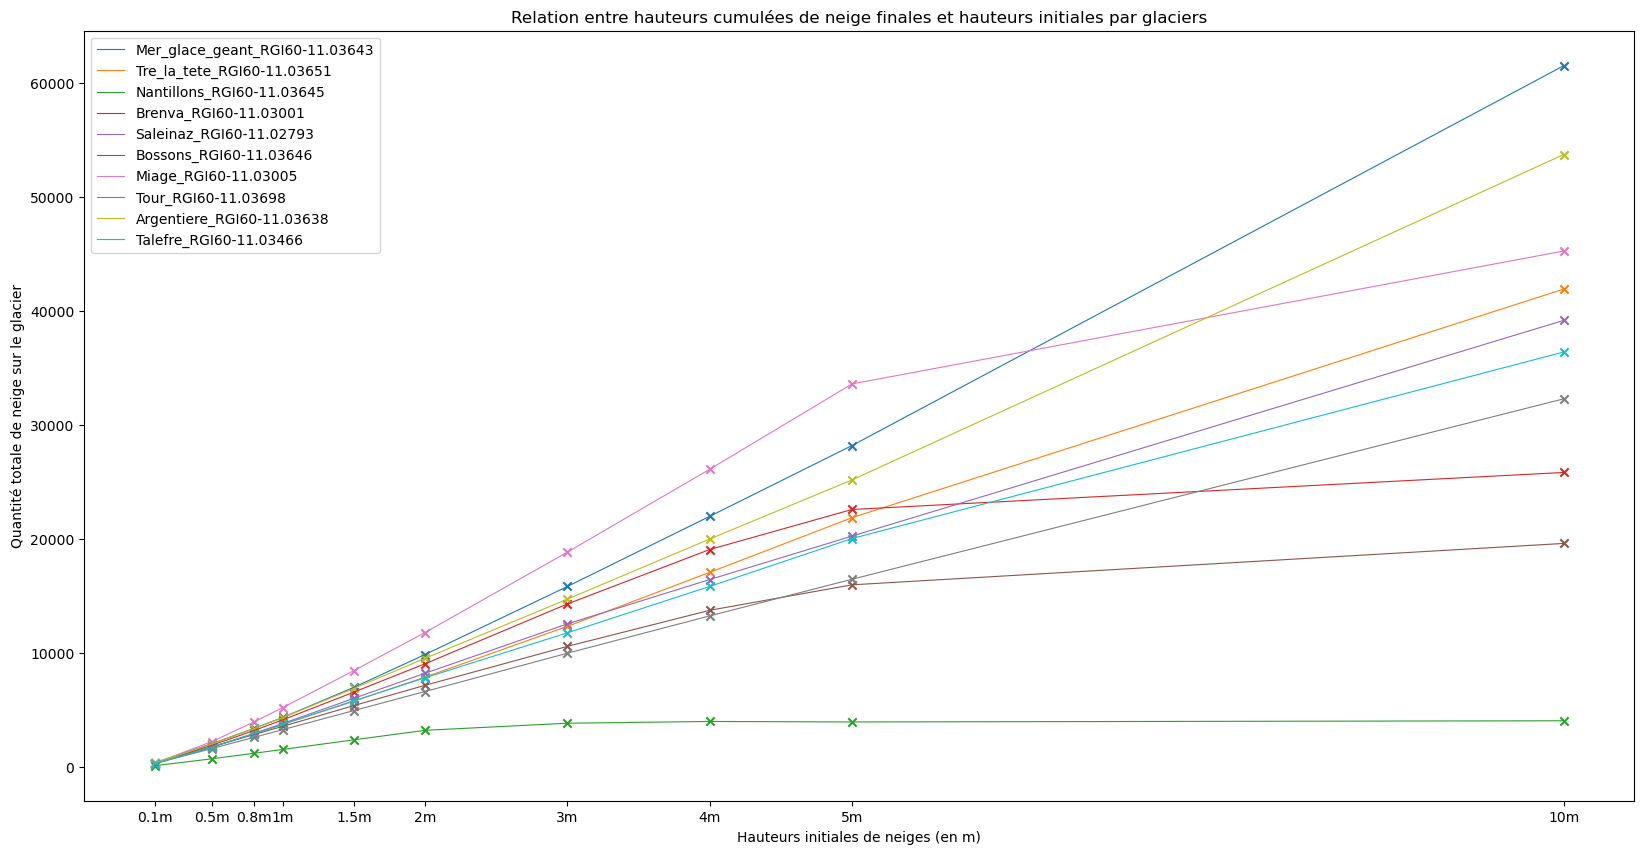

In [10]:
# Intégrale des hauteurs finales de neige 
path = '/Users/llemcf/Desktop/Stage_IGE_2023/Snowslide x OGGM/Glacier_tests/SNDs_2.npy'
SND_mask = np.load(path,allow_pickle=True)

integral = []
for i in range(10) :
    int = []
    for j in range(10) : 
        int.append(np.sum(SND_mask[i][j]))
    integral.append(int)
integral = np.array(integral)
integral = np.transpose(integral)
integral

# Quantités initiales 
init = np.zeros((10,10))
heights = np.array([0.1,0.5,0.8,1,1.5,2,3,4,5,10])
for i in range(10) :
    init[i][:] = heights[i]
init = np.transpose(init)
init

colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan']
plt.figure(figsize=(20,10))
for i in range(10) :
    plt.scatter(init[i],integral[i],color=colors[i],marker="x")
    plt.plot(init[i],integral[i], color=colors[i],linewidth=0.8,label=dossiers[i])
    plt.xticks(init[i], ['0.1m','0.5m','0.8m','1m','1.5m','2m','3m','4m','5m','10m'])
plt.legend()
plt.title('Relation entre hauteurs cumulées de neige finales et hauteurs initiales par glaciers')
plt.xlabel("Hauteurs initiales de neiges (en m)")
plt.ylabel("Quantité totale de neige sur le glacier")

Text(0, 0.5, 'Hauteur moyenne de neige sur le glacier')

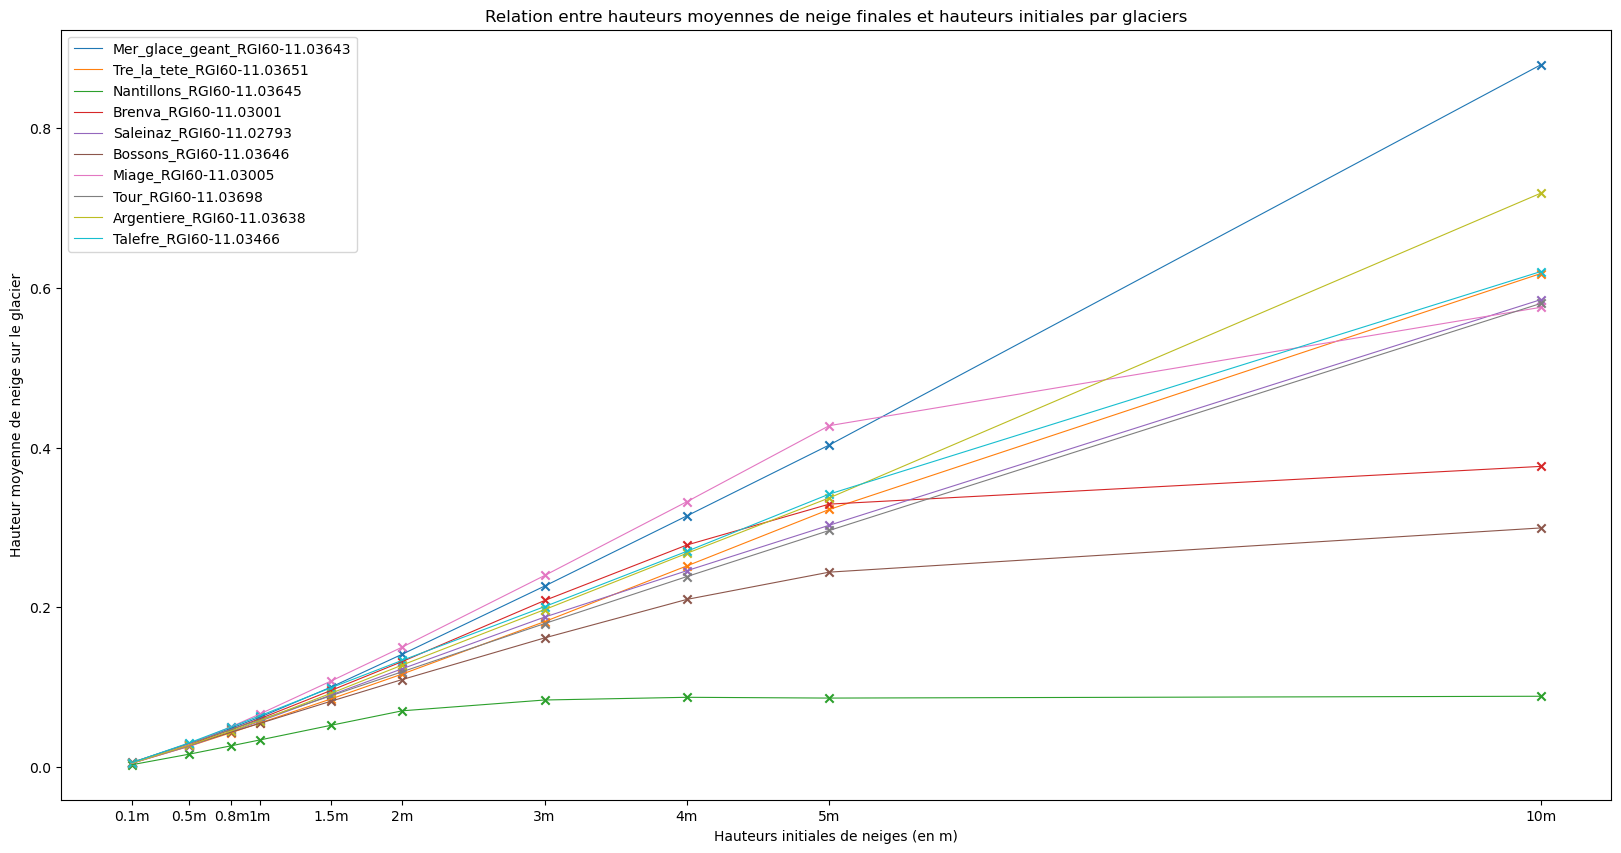

In [11]:
path = '/Users/llemcf/Desktop/Stage_IGE_2023/Snowslide x OGGM/Glacier_tests/SNDs_2.npy'
SND_mask = np.load(path,allow_pickle=True)
np.shape(SND_mask)
integral = []
for i in range(10) :
    int = []
    for j in range(10) : 
        int.append(np.mean(SND_mask[i][j]))
    integral.append(int)
integral = np.array(integral)
integral = np.transpose(integral)

# Quantités initiales 
init = np.zeros((10,10))
heights = np.array([0.1,0.5,0.8,1,1.5,2,3,4,5,10])
for i in range(10) :
    init[i][:] = heights[i]
init = np.transpose(init)
init

colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan']
plt.figure(figsize=(20,10))
for i in range(10) :
    plt.scatter(init[i],integral[i],color=colors[i],marker="x")
    plt.plot(init[i],integral[i], color=colors[i],linewidth=0.8,label=dossiers[i])
    plt.xticks(init[i], ['0.1m','0.5m','0.8m','1m','1.5m','2m','3m','4m','5m','10m'])
plt.legend()
plt.title('Relation entre hauteurs moyennes de neige finales et hauteurs initiales par glaciers')
plt.xlabel("Hauteurs initiales de neiges (en m)")
plt.ylabel("Hauteur moyenne de neige sur le glacier")

In [12]:
# Hauteurs de neige sur flowline
path = '/Users/llemcf/Desktop/Stage_IGE_2023/Snowslide x OGGM/Glacier_tests/SNDs_2.npy'
SND_mask = np.load(path,allow_pickle=True)

- Lignes : hauteurs de neige initiales
- Colonnes : glaciers 

### On refait l'opération de binnage

In [13]:
def bin_to_elevation_band(SND,dem,band,name,operation,normalise_init,normalise_bin,plot) :
    """
    Fonction avec laquelle on affiche sur un graphique les hauteurs de neige sommées par bande d'altitude de 10m
    
    Paramètres
    ----------
    SND : liste contenant les matrices des hauteurs de neige classées par hauteur initiales
    dem : geotiff ouvert avec rasterio
    band : difference d'altitude d'une bande
    name : nom du glacier étudié 
    operation : on choisit le type d'operation menée sur chaque band : 
        - "mean" : on moyenne sur la bande
        - "sum" : on somme sur la bande
    normalise_init : 
        - True : on divise par la hauteur initiale
        - False : on ne divise pas par la hauteur initiale
    normalise_bin :
        - True : on rapporte les données à un bin entre 0 et 1 pour comparer les glaciers entre eux. 
        - False : on ne normalise pas les données de binnage
    plot : on affiche le résultat si True 
    
    Sortie
    ------
    liste des vecteurs de hauteurs de neige cumulées par altitudes classés par hauteur initiale
    """
    
    # Calcul du vecteur divisant le dem en bandes d'altitudes de 30m entre son min et son max 
    min_elev = np.min(dem[np.where(dem > 0)]) # Altitude minimale sur le glacier
    max_elev = np.max(dem)
    bin = np.arange(min_elev,max_elev + band,band) # Bandes de 30m entre min et max elev

    # On calcule une matrice qui associe à chaque pixel du dem son indice dans le vecteur de bandes d'altitudes
    index_bin = np.digitize(dem,bin)

    # On assemble les données de SND en groupant (somme) les pixels ayant la même altitude sur le dem
    # On ajoute cette valeur à un vecteur à l'indice correspondant à cette altitude 
    factor = [10,2,1/0.8,1,1/1.5,0.5,1/3,1/4,1/5,1/10]
    flowlines = []
    total_volume = []
    nb_bands = len(bin) # Nombre de bandes d'altitudes définies selon le dem
    for i in range(len(SND)) : # Pour chaque hauteur initiale 
        vector = np.zeros(nb_bands) # C'est la flowline de taille identique au vecteur de bin donnant les bandes d'altitudes
        # On complète ce vecteur avec les valeurs
        if operation == "sum" :
            for band in range(nb_bands):
                vector[band] = np.sum(SND[i][np.where(index_bin == band)]) 
        if operation == "mean" :
            for band in range(nb_bands):
                vector[band] = np.mean(SND[i][np.where(index_bin == band)])
        if normalise_init == True :
            vector = vector * float(factor[i]) # On normalise la hauteur finale par la hauteur initiale
        flowlines.append(vector)
        total_volume.append(np.sum(SND[i])*factor[i]*(30*30))
    
    if normalise_bin == True :
        bin = (bin-np.min(bin))/(np.max(bin)-np.min(bin))

    if plot == True :     
        names = ['init = 0.1m','init = 0.5m','init = 0.8m','init = 1m','init = 1.5m','init = 2m','init = 3m','init = 4m','init = 5m','init = 10m']
        fig,ax = plt.subplots(2,1,figsize = (10,10)) # On initialise la figure
        for j in range(len(SND)) :
            ax[0].plot(bin,flowlines[j])
            ax[0].set_title(f"Statistique de '{operation}' sur les hauteurs de neige par bande d'altitude, normalisé = {normalise_init}")
            ax[0].set_xlabel("Bandes d'altitudes (m)")
            ax[0].set_ylabel(f"{operation} Snow height for each elevation band (m)")
            ax[0].legend(names)
        ax[0].text(np.min(bin),np.max(flowlines)-10,f"{name}",bbox=dict(facecolor='grey', alpha=0.06),fontsize=12)
            
        label = ['0.1m','0.5m','0.8m','1m','1.5m','2m','3m','4m','5m','10m']
        ax[1].bar(label, total_volume)
        ax[1].set_xlabel('Hauteurs initiales')
        ax[1].set_ylabel('Volumes totaux normalisés')
        ax[1].set_title('Volumes totaux normalisés de neige sur glacier en fonction de hauteur initiale')      
        ax[1].text(np.min(factor),np.max(total_volume),f"{name}",bbox=dict(facecolor='grey', alpha=0.06),fontsize=12) 

    return bin,np.array(flowlines)

In [14]:
# on récupère les DEMs dans le même ordre et on applique un masque du glacier pour n'avoir que ces altitudes là
path = '/Users/llemcf/Desktop/Stage_IGE_2023/Snowslide x OGGM/Glacier_tests'
dems = []
name = []
for elt in dossiers :
    dem_path = path + '/' + elt + '/dem.tif'
    name.append(elt[:-15])
    with rasterio.open(dem_path) as src :
        dem = src.read(1)

        xr_path = path + '/' + elt + '/gridded_data.nc'
        ds = xr.open_dataset(xr_path)
        
        dem[np.where(ds.glacier_mask == 0)] = 0

        dems.append(dem)

(array([0.        , 0.02083333, 0.04166667, 0.0625    , 0.08333333,
        0.10416667, 0.125     , 0.14583333, 0.16666667, 0.1875    ,
        0.20833333, 0.22916667, 0.25      , 0.27083333, 0.29166667,
        0.3125    , 0.33333333, 0.35416667, 0.375     , 0.39583333,
        0.41666667, 0.4375    , 0.45833333, 0.47916667, 0.5       ,
        0.52083333, 0.54166667, 0.5625    , 0.58333333, 0.60416667,
        0.625     , 0.64583333, 0.66666667, 0.6875    , 0.70833333,
        0.72916667, 0.75      , 0.77083333, 0.79166667, 0.8125    ,
        0.83333333, 0.85416667, 0.875     , 0.89583333, 0.91666667,
        0.9375    , 0.95833333, 0.97916667, 1.        ]),
 array([[0.00000000e+00, 2.00000000e+00, 6.00000000e+00, 3.00000000e+00,
         6.00000000e+00, 7.00000000e+00, 6.00000000e+00, 8.00000000e+00,
         1.30000000e+01, 2.00000000e+01, 4.30000000e+01, 6.90000000e+01,
         1.30000000e+02, 8.60000000e+01, 8.40000000e+01, 8.10000000e+01,
         1.58000000e+02, 1.80000000e+0

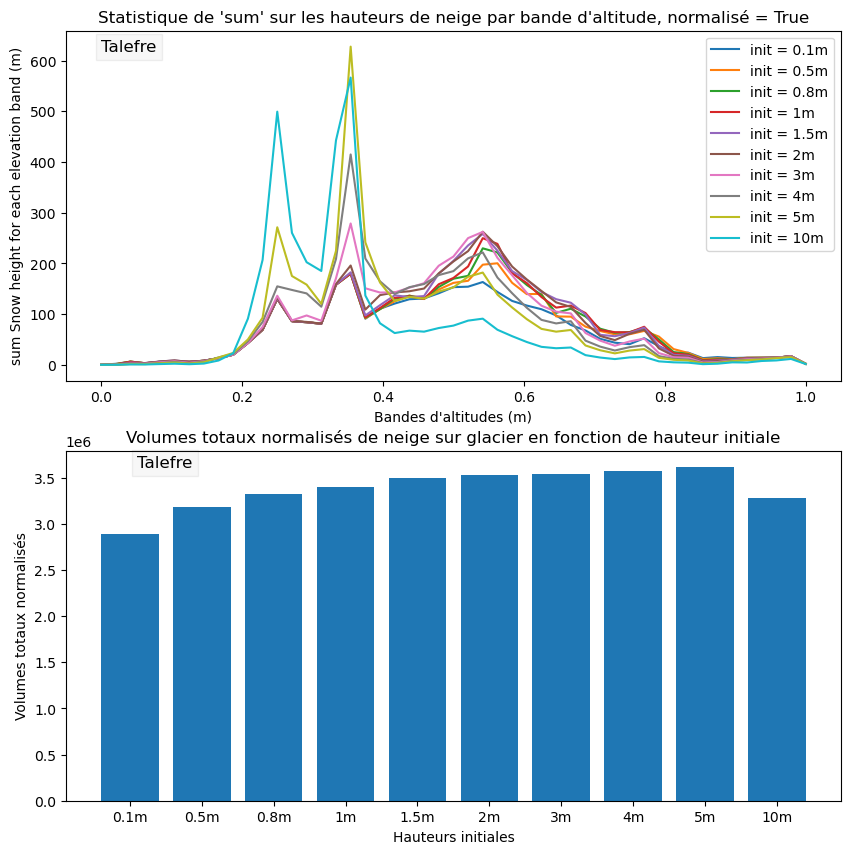

In [16]:
glacier = 9
SND = np.transpose(SND_mask)
SND = SND[glacier]
dem = dems[glacier]
band = 30
bin_to_elevation_band(SND,dem,band,name[glacier],"sum",True,True,True)

### On affiche en normalisant les bin et en moyennant les hauteurs initiales pour comparer tous les glaciers entre eux

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


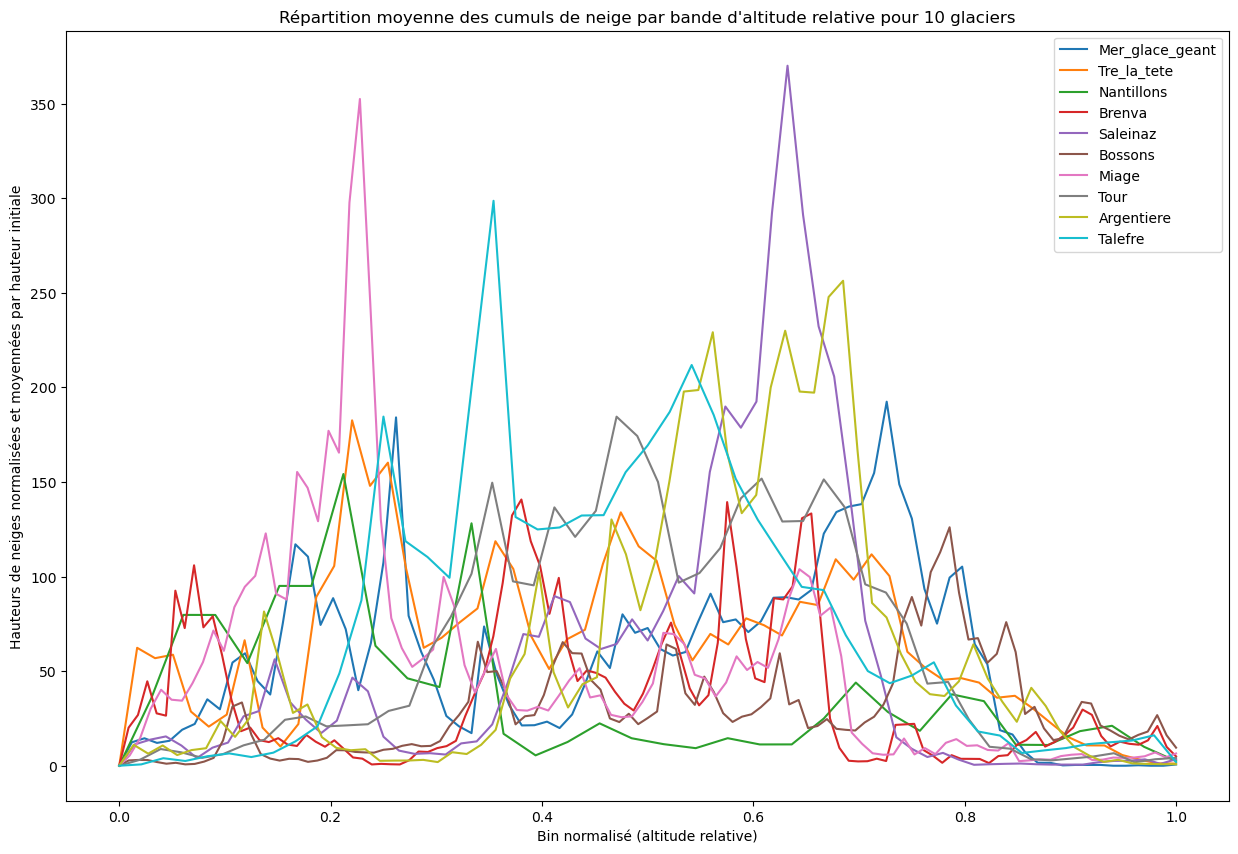

In [706]:
glacier_flowlines = []
plt.figure(figsize=(15,10))
for glacier in range(10) :
    SND = np.transpose(SND_mask)
    SND = SND[glacier]
    dem = dems[glacier]
    band = 30
    bin,flowline = bin_to_elevation_band(SND,dem,band,name[glacier],"sum",True,True,False)
    flowline = np.mean(flowline,axis=0)
    #glacier_flowlines.append(flowline)
    plt.plot(bin,flowline)
    plt.xlabel("Bin normalisé (altitude relative)")
    plt.ylabel("Hauteurs de neiges normalisées et moyennées par hauteur initiale")
    plt.legend(name)
    plt.title("Répartition moyenne des cumuls de neige par bande d'altitude relative pour 10 glaciers")